# COVID in Rhode Island: an analytical approach

Please run this cell to ensure following cells work properly:

In [30]:
%load_ext autoreload
%autoreload 2

import helpers
import plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction

The smallest state in the nation, Rhode Island, is currently facing a potential second wave of COVID-19 cases due to a new uptick in recent cases.  Like other states in America, Rhode Island will be faced with having to allocate resources effectively to various groups and hotspots in the state as these cases start to increase.  Our project will focus on finding trends within various datasets to try to make sense of which groups of people are facing the most hardships when it comes to being diagnosed with COVID-19.

Governor Gina Raimondo seemed to effectively test many people in the state during the first wave, to collect data.  However, the state is quickly becoming depleted financially, and will need to utilize lessons learned and trends from previous data (especially within the first wave) to conquer and mitigate the risk that comes with a second wave.  The state will need to act in a more targeted way in the future, to effectively use their resources and work smartly to overcome the uncertainty of COVID.

With this past data, we are attempting to create some possible ways the governor can allocate resources and funds she may have to combat the illness. Especially since COVID-19 is seen in outbreaks, it is important to find the groups where the transmission is higher than other groups (such as the groups we analyzed: age, race, municipality).  Below we have outlined three questions that can be answered with the data trends, and will allow the Rhode Island Government to consider multiple paths forward if they’d like to achieve a certain mitigation goal for the state. The following question summarizes what our visualization will answer:

### Which groups (age/race/municipality) should Gov. Gina Raimondo allocate resources to in order to prevent COVID-19 (cases/hospitalizations/deaths)?

Telling the story is very important because with COVID, along with the constant easing and tightening of restrictions, outbreaks will occur until a preventative treatment is introduced.  Using data to make decisions about allocation resources in the face of multiple outbreaks is value, only if the way that data is analyzed shows the whole story.  We used the following parameters to analyze the data because we thought a combination of these parameters would tell as close to the full story as possible with the raw data provided (like age, race, municipality).

**Why Rhode Island?**
We chose Rhode Island as our target state, out of all the states, for a variety of reasons:
* Size - Rhode Island’s population is just over 1 million people.  Though this is quite a lot of people, it is significantly relatively smaller than many other areas in America that are governed at a state, or even local level.  In some cases, Rhode Island’s population is smaller than the population in big cities, making it the ideal population size to successfully govern at the state level.
* Testing Capacity - Thanks to a partnership with CVS, which is headquartered in the state, Rhode Island is a leader in America for testing percentage per population (according to [Johns Hopkins](https://coronavirus.jhu.edu/testing/states-comparison), Rhode Island is just behind North Dakota). Just a few weeks ago, Rhode Island announced it had conducted 1 million COVID tests.  While not everyone in the state has been tested, for a few months now, Governor Raimondo has made it clear that Rhode Island has much more testing capacity than other states, and is rarely turning people away from testing sites.  This means, most of the people that need testing receive it, and this also means the data probably more accurately reflects the actually infection rate that the state is facing, rather than a large state like Texas, where the data is not as accurate because not every citizen that needs a COVID-19 test can get one.
* Diversity and Density -  Rhode Island has a few main towns and one main city, making it still a very densely populated state in a few areas, with wide ranging demographic groups.  With these differences, we can start to see trends even within such a relatively small sample size for the United States.  This makes it easier to find key statistics in certain areas or within certain groups of people, without processing a very large amount of data.
* Transparency - Data from testing facilities, hospitals, and other important sources are, and always have been, compiled by the government, and been shared at least weekly to the public.  Gina Raimondo has time after time clearly stated facts being pulled from the data trends, and has not withheld information that is vital to the public for combatting COVID-19.  While HIPAA privacy laws still make it difficult to get accurate patient data, in comparison to a few other raw data sets provided by other states with testing, Rhode Island seems to have the most comprehensive, transparent data available in the Northeast.

Overall, to tell this story in the best way possible, we looked at the various data available to us through the Rhode Island Department of Health, and made decisions about which groupings within the data we wanted to look at.  We felt as though to get the most complete story about the Rhode Island Population, we had to look at groupings that apply to everyone (examples: age and race, as everyone can be labeled with these).  Though the Department of Health had great information on things like schools, we chose to intentionally overlook these worksheets because not everyone in the state is a student.  We hope you enjoy our analysis.

## Methodology

In order to tell this story, we found where the new case, hospitalization, and death data is stored for Rhode Island, which was through the Rhode Island Department of Health, or RIDOH.  We got our data through a [Google Sheets link](https://docs.google.com/spreadsheets/d/1c2QrNMz8pIbYEKzMJL7Uh2dtThOJa2j1sSMwiDo5Gz4/edit#gid=264100583) shared from the [RIDOH webpage](https://ri-department-of-health-covid-19-data-rihealth.hub.arcgis.com/).

The Rhode Island Department of Health webpage currently holds a very basic dashboard linked to the data from the Google Sheet.  The Google Sheet contained all the raw data we used for our project, to make more elaborate data visualizations than that found on the Department of Health’s page.

Since the workbook was hosted on Google Sheets, we used the `requests` library to download a CSV file of each individual worksheet. Google Sheets URLs have two components, that of the overall workbook as well as that of individual worksheets, the latter being known as a `gid`. We stored the link to the overall workbook as a string and created a dictionary of worksheets and their respective gids. The function `get_covid_data` downloads the worksheet it’s given as an argument and saves it as a CSV.

The data was stored in CSV form and processed using Pandas. We used data from `Municipality.csv` as well as `Demographics.csv` in the creation of our bar charts and heatmaps. These files included case, hospitalization, and death information by age, race, and city/town.

## Graphs

Visually, we wanted to capture and showcase key demographics that were hard hit by COVID.
We used bar charts to break down various groups of people, like ages and races found within the state.  These bar chart percentages are out of the total number of people represented in the bar chart, not out of the total people in the state.
We also used heat maps to look at the geographic differences with rates of COVID infections to make sure that the most dense places in the state were also carrying the most amounts of COVID infections, to be sure that our assumption of densely populated areas being harder hit by COVID was accurate.

Below are each of the visualizations produced from the data, along with written observations for every graph.

In [31]:
# Download the most updated Demographic data from the RIDOT Google Sheets Workbook
helpers.get_covid_data("Demographics")

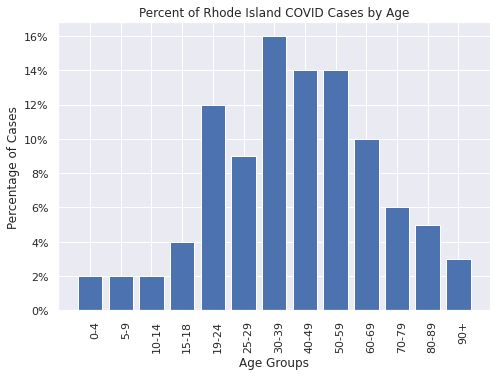

In [32]:
plot.plot_demographic_data("Age_Cases", plot.clean_demographic_data("Age_Cases"))

#### 1. Cases by Age:
People just below middle age, like 30-39 years old, seem to be the most affected out of all the Rhode Islanders that test positive for COVID.  It also seems like the middle age groups, like 40-59 are also evenly affected.
The peak in college-aged people with COVID cases seems to be due to the amount of college in Rhode Island that moved to in-person learning in September (in which there were a few outbreaks, like with Providence College).

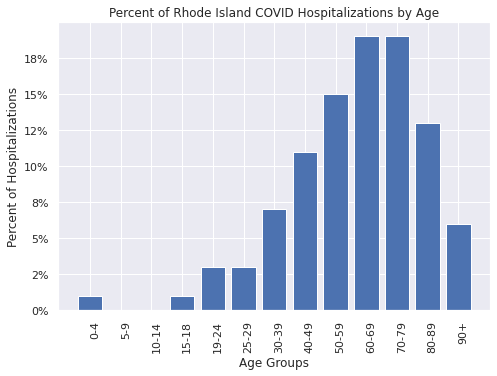

In [33]:
plot.plot_demographic_data("Age_Hospitalizations", plot.clean_demographic_data("Age_Hospitalizations"))

#### 2. Hospitalizations by Age:
The peak of the percentages has shifted a bit more to the right, indicating that those above middle aged people are being hospitalized.
Interestingly, the percentage drops off in the older ages, and we think this is because many elderly people in RI that are being diagnosed with COVID live in nursing homes, and therefore, wouldn’t be transferred to hospitals to receive treatment for the disease.

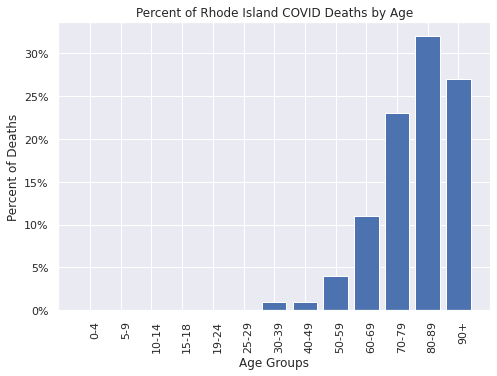

In [34]:
plot.plot_demographic_data("Age_Deaths", plot.clean_demographic_data("Age_Deaths"))

#### 3. Deaths by Age:
The peak has moved more to the right, indicating that the elderly are dying more frequently than any other age group diagnosed with COVID.  This is consistent with what we are seeing nationally and around the world.

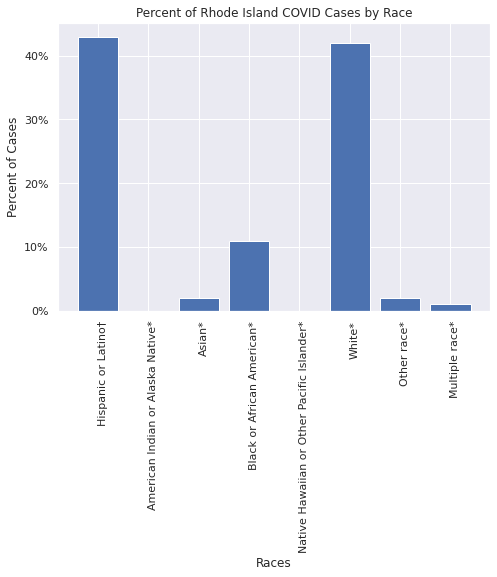

In [35]:
plot.plot_demographic_data("Race_Cases", plot.clean_demographic_data("Race_Cases"))

#### 4. Cases by Race:
Hispanic/Latino and White stand out the most, making up about 40% each.  With background research, and the Census report, we found out the majority of people in Rhode Island are White alone (not including Hispanic or Latino), at 71.4% of the population.  The Hispanic and Latino population makes up about 16.3% percent of the state’s population.  It is clear that Hispanic/Latino people are disproportionately affected by COVID-19 in Rhode Island, even though in the graph, both White and Hispanic people seem evenly affected.

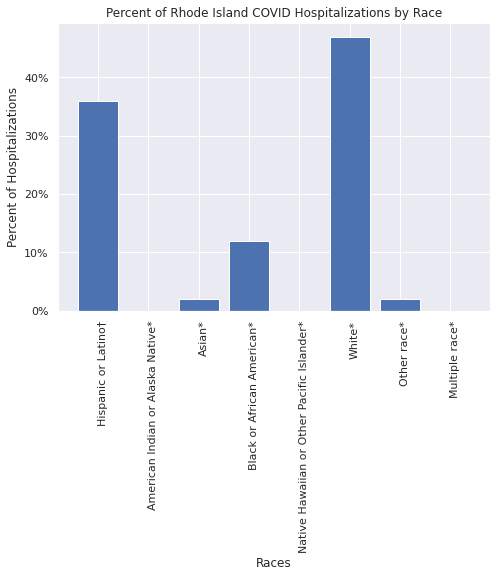

In [44]:
plot.plot_demographic_data("Race_Hospitalizations", plot.clean_demographic_data("Race_Hospitalizations"))

#### 5. Hospitalizations by Race:
Again, Hispanic/Latino and White people seem to stand out the most, with Hispanic/Latino people taking up less of a percentage than last time.  There is also a slight jump in White people being hospitalized in comparison to other races who have been hospitalized.

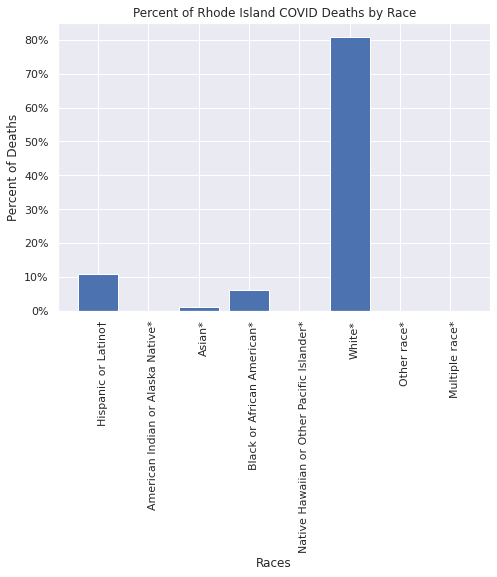

In [37]:
plot.plot_demographic_data("Race_Deaths", plot.clean_demographic_data("Race_Deaths"))

#### 6. Deaths by Race:
Though Hispanic/Latino people are heavily affected by COVID when it comes to new cases and hospitalizations, interestingly, they are not as big of a percentage as White people when it comes to deaths. The largest percentage of people dying from COVID in Rhode Island are White people.

In [38]:
gis_url = "https://opendata.arcgis.com/datasets/957468e8bb3245e8b3321a7bf3b6d4aa_0.zip"
# Download and unzip GIS data, used for heatmap creation
helpers.download_unzip(gis_url)

In [39]:
# Download the most updated Municipality data from the RIDOT Google Sheets Workbook
helpers.get_covid_data("Municipality")

In [40]:
# Clean data for use in heatmap creation
for item in plot.heatmap_data_dimensions:
    plot.clean_heatmap_data(item)

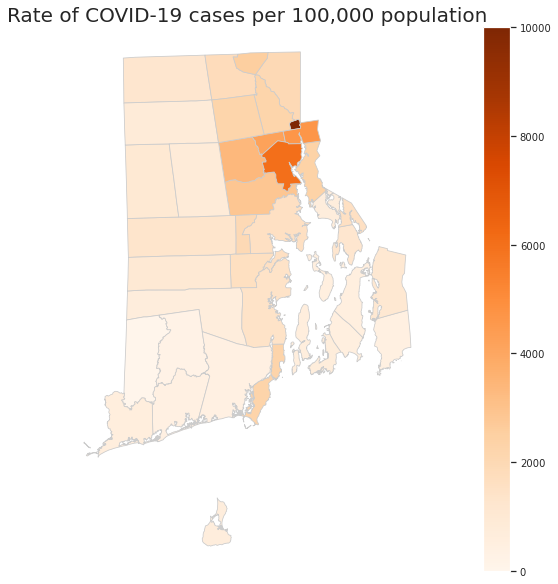

In [41]:
plot.plot_heatmap_data("Cases")

#### 7. Cases by Municipality:
As seen on this heatmap, it looks like the hardest hit area is near the capital of Providence.
Interestingly, there also seems to be higher case rates in the south, near beach areas.  However, the place that stands out the most is Central Falls, which is a clear anomaly when it comes to cases, and shows up as very dark.
After further research, Central Falls is the densest municipality in the state, and is almost twice as dense as Providence, so the heat map for cases seems to loosely correlate to population density in that area.

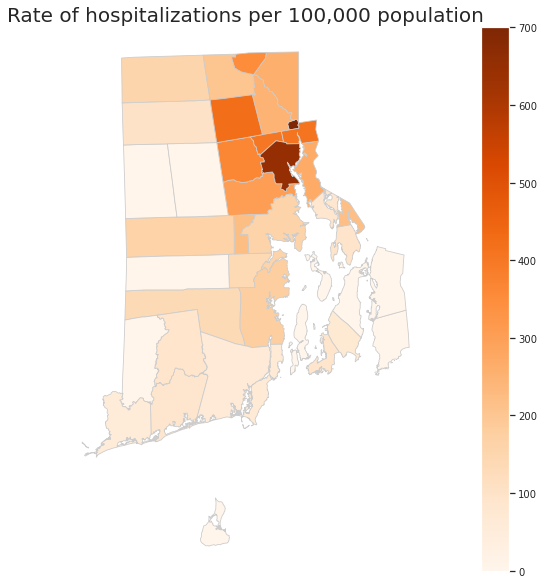

In [42]:
plot.plot_heatmap_data("Hospitalizations")

#### 8. Hospitalizations by Municipality:
Providence and Central Falls are both still pretty dark again, just like with cases above. 

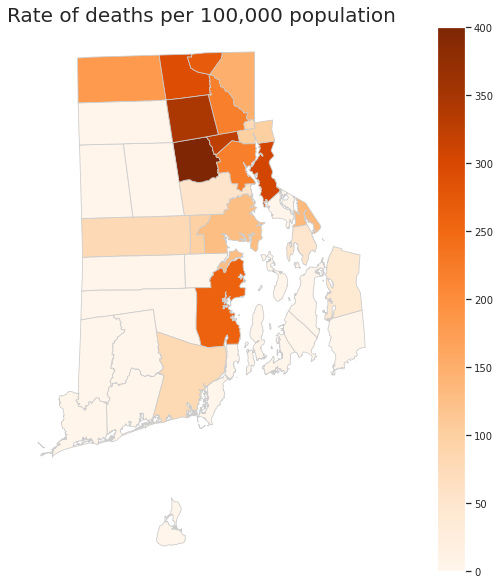

In [43]:
plot.plot_heatmap_data("Deaths")

#### 9. Deaths by Municipality:
Johnston, a suburb of Providence, and areas surrounding Johnston as well are seemingly the most affected by COVID deaths in the state.  The heat map for deaths clearly does not correlate to population density any longer.

### Special Notes About Visualizations:

* We decided to use a bar chart instead of a pie chart for races because the Hispanic or Latino category can include people of all races, so the data did not add up to 100%.

* While cleaning the data, we changed what we considered “insignificant data,” any data point denoted as “<1%”, or “--”, to 0%. 

* We could not look at the data in combinations, because each of the data was siloed in the sheets by category.  For example, while we knew that elderly and white people in Rhode Island were heavily affected, we don’t know how many of those people were both elderly and White.  This is because of HIPAA laws, to keep patients’ privacy.

* While we would’ve loved to have raw data that showed each individual patient’s age, race, and place of residency, we know this is not possible due to HIPAA.  We believe we could more accurately pinpoint certain combinations of groups being affected if we had more raw data as explained above.

## Results

After viewing the visualizations, we came to a variety of conclusions as to where resources should be allocated based upon groups of people experiencing COVID more frequently than others.

### Age
For cases, the governor should pay special attention to people ages 30-59, as well as the college-age population.  It seems like younger people are getting sick with COVID more often, even though it isn’t making them as sick (since they are not going to the hospital or dying as frequently).  Perhaps the governor can require surveillance testing for these young people that may not show symptoms as much, like offering a government-subsidized test every two weeks.  This would help these younger people become more aware of the part they play in preventing COVID and bring more data back to the state of Rhode Island, since most of the testing done now is for those experiencing symptoms.

Hospitalizations seem to encompass the 60-79 age range.  In order to prevent hospitalizations, perhaps the government can try to use a similar method for preventing COVID cases (like surveillance testing) but also go a bit further and offer a free mask, or face shield to people who are around this age, since they need to be protected more so than young people.

Also, deaths are unfortunately affecting the older population (80+), which seems to be residing primarily in nursing homes, according to other reports from the RIDOH, so the Governor should be distributing resources like PPE for nursing home workers, and resources for residents as well.

### Race

For both new cases and hospitalizations, White and Hispanic residents of the state are heavily affected.  Though Rhode Island is fairly diverse, it does have a high White population, as reflected in the race-related graphs.

We do not have specific recommendations when it comes to race, because we believe there is still more work that needs to be done when it comes to analyzing the general population.  For example, it is shocking that Hispanic/Latino people are hospitalized almost as frequently as White people, yet White Rhode Islanders die from COVID the most.  One hypothesis we have is that elderly populations in Rhode Island tend to be especially White, which may explain why the death rate for the elderly is so much higher for people who identify as White.

Overall, we realize the data of the groups of races was not as useful, because there weren’t many clear conclusions we could come to.

### Municipality

Finally, different areas around Rhode Island have varying ebbs and flows of outbreaks.  The Governor should pay the closest attention to the densest areas, with a high density of people, as those seem to do more poorly than suburban or rural areas in the state.  

Unfortunately, for cases and hospitalizations, one of the poorer, more densely populated areas in Rhode Island, known as Central Falls, is getting hit hard.  

The Governor can try to make testing more accessible in these spaces where more people live, instead of having large testing centers in one town, like the first testing center in Woonsocket in the spring and summer.  The Governor can also look to see which neighborhoods in these areas are being most affected, and try to allocate resources to these specific hotspots, instead of just the general community.

Unsurprisingly, the capital city of Providence is being hard hit with hospitalizations.

Most interestingly, Johnston is the municipality most affected by deaths.  After further research, we saw many of the nursing homes that experienced severe losses and had highly affected residents during the first wave are in this area.  We see that connection to our qualifier of age, and again recommend that the Governor takes a targeted effort to get resources to these homes.

## Conclusion

Many of the important insights we discovered are in the results section of this computational essay.  However, our ultimate call to action can be summed up in this table, where the groups suffering most are listed and bolded. We recommend that Governor Raimondo focus on these indicated groups in order to ease the spread of COVID-19 in the state of Rhode Island.


|              | Cases                  | Hospitalizations          | Deaths            |
|--------------|------------------------|---------------------------|-------------------|
| **Age**          | **30-39**, 40-49, 50-59    | 60-69, 70-79              | 70-79, **80-89**, 90+ |
| **Race**         | White, **Hispanic/Latino** | **White**, Hispanic/Latino    | White             |
| **Municipality** | Central Falls          | **Central Falls**, Providence | Johnston          |


This is such a sensitive topic, especially with so many people dying and case numbers growing each day.  We also understand that our results and conclusions are biased, just like the frame we used to analyze the data, and also like the data itself (some people are not represented in the data, and these include people getting sick with COVID-19 who never test positive due to faulty tests, or lack of ability to receive one).  We also realize that many of our conclusions leave entire groups of people out of the picture, who may also need help, but will not receive it if these recommendations are implemented (middle-aged people are still dying, but not as frequently as the elderly).  There are always going to be people in the minority, and if Rhode Island had the resources to help everyone, we are sure they would.  But for now, we are completely aware that leaving anyone out is a failure, and even if they aren’t in a trend or spike in a graph, they should still be equally considered when allocating resources effectively.

We learned a variety of lessons from this project.  The first, most important one is that of patient privacy.  The HIPAA laws very much hindered our ability to compare groups of people to each other, but we also learned that patient privacy is an essential part of being able to treat viruses.  It is always better to put the rightful privacy of people above anything else, especially in a world that demands so much information constantly.  We can understand why HIPAA is so necessary.  The second is that when data sets are new and emerging, trends can change quickly.  As we looked at the week by week breakdown of the data, it is clear that as the data changed, so did assumptions.  We know that COVID-19 is still new, and some of our conclusions for this project may not age well, because scientists still have so far to go when it comes to analyzing this virus, and who it may affect the most (and therefore, where resources should be targeted).  These two lessons made us realize that we can only try our best to helpfully analyze data and make informed conclusions that can help benefit the world.

The most difficult part of our project included understanding the raw data, visualizing the data, and analyzing the data.  We had to take time to read through the giant workbook collated by the RIDOH in order to most effectively pick how to visualize what we thought were the most important aspects of the data.  While this is more subjective than objective, we did try to make very educated decisions about what data to use, and this simply took a lot of time.  Also, when using a heat map, it took us a while to learn how to use the geopandas library, because we had never created a heat map with Python before.  After reading and researching, we were able to successfully implement those important visualizations.  We concluded the project by digging into even more research, like Rhode Island news stories, or population density, or town insights in order to try to understand why some people experienced more breakouts of COVID-19 than others.  The most frustrating part was that we knew we would never be able to paint the full picture, and with the limited resources Rhode Island has, we would also never be able to allocate it perfectly to everyone suffering from COVID in some way.  We believe this is why Governor Gina Raimondo has much work to do- because being a governor sometimes means making sacrifices that don’t benefit everyone in the state.  This is probably the most unfortunate thing we’ve realized.

We would absolutely dig into more of the data from Rhode Island if we had more time.  There were so many sheets that we deemed as quite interesting, but not applicable to the whole population of Rhode Island, like data on nursing homes and schools.  We would try to dig into these pockets of the population more and address the data on a smaller scale.  To truly extend it, we would also try to find more trends throughout the country, and even the world, if we could.

We thoroughly enjoyed taking the time to understand what just one small part of the world is up against during this pandemic.  We know the world has a long way to go, but we also know data is a huge part of the fight to try to prevent the spread of COVID-19.
